In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/joaob/OneDrive/Documentos/dados/weatherAUS.csv')

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
df2 = pd.DataFrame({'Location': df['Location'], 
                    'MinTemp': df['MinTemp'], 
                    'MaxTemp': df['MaxTemp'], 
                    'Rainfall': df['Rainfall']})

In [12]:
df2.head()

,Location,MinTemp,MaxTemp,Rainfall
0,Albury,13.4,22.9,0.6
1,Albury,7.4,25.1,0.0
2,Albury,12.9,25.7,0.0
3,Albury,9.2,28.0,0.0
4,Albury,17.5,32.3,1.0


In [14]:
df2.columns = 'local', 'mintemp', 'maxtemp', 'chuva'

In [15]:
df2.columns

Index(['local', 'mintemp', 'maxtemp', 'chuva'], dtype='object')

In [18]:
df2.isnull().sum()

local      0
mintemp    0
maxtemp    0
chuva      0
dtype: int64

In [17]:
df2['mintemp'].fillna(df2['mintemp'].median(), inplace = True)
df2['maxtemp'].fillna(df2['maxtemp'].median(), inplace = True)
df2['chuva'].fillna(df2['chuva'].median(), inplace = True)

In [26]:
df2.corr()

,mintemp,maxtemp,chuva
mintemp,1.000000,0.733358,0.102339
maxtemp,0.733358,1.000000,-0.073563
chuva,0.102339,-0.073563,1.000000


<AxesSubplot:>

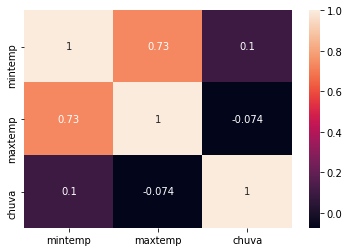

In [27]:
sns.heatmap(df2.corr(), annot = True)

<AxesSubplot:>

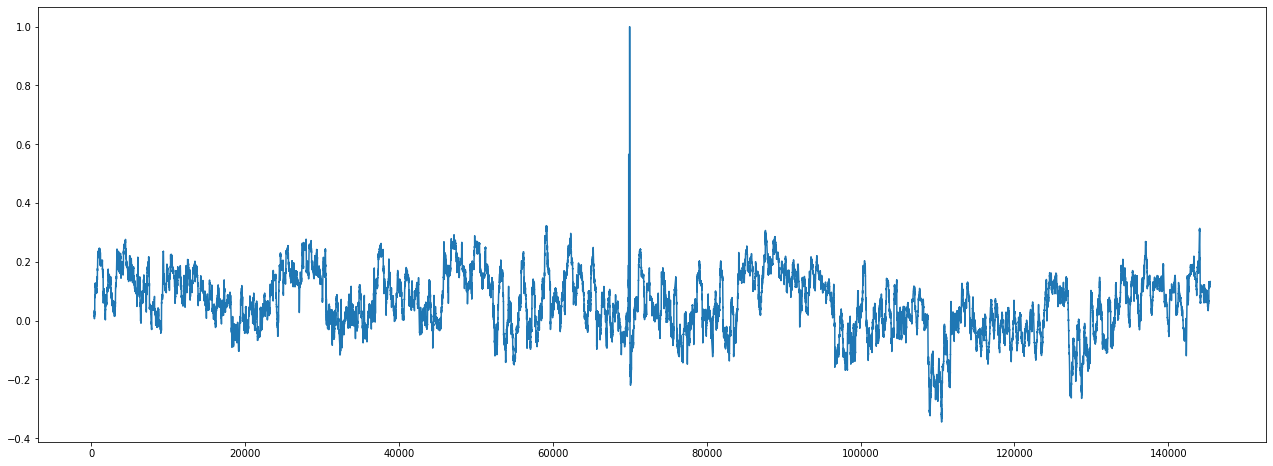

In [32]:
df2['chuva'].rolling(365).corr(df2['mintemp']).plot(figsize=(22,8))

In [33]:
df2['chuva'].max()

371.0

In [34]:
df2['chuva'].min()

0.0

In [37]:
df2['chuva'].median()

0.0

In [41]:
df2['chuva'].var()

70.38825658243863

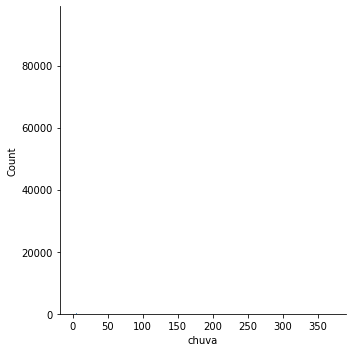

In [42]:
sns.displot(df2['chuva'])